<a href="https://colab.research.google.com/github/saddarudin/google_colab/blob/main/GenAI_Agents_and_Toolkits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langchain --quiet
!pip install cohere --quiet
!pip install tiktoken --quiet
!pip install wikipedia
!pip install serp
!pip install google-search-results
!pip install arxiv
!pip install langchain_experimental
!pip install langchain_community --quiet

In [3]:
import os
from google.colab import userdata

# os.environ['SERPAPI_API_KEY'] = userdata.get('SERPAPI_API_KEY')
os.environ['COHERE_API_KEY'] = userdata.get('COHERE_API_KEY')

In [18]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain.llms import Cohere

##Agent Example

In [22]:
llm = Cohere(temperature=0)
tools = load_tools(['wikipedia'],llm=llm)
agent=initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
    )
question = """
What is the Capital of Bhutan?
"""
agent.run(question)



> Entering new AgentExecutor chain...
 The capital of Bhutan is a tricky question! I will use Wikipedia to find the answer to this question. 

Action: wikipedia
Action Input: capital of Bhutan
Observation: Page: Thimphu
Summary: Thimphu ( tim-POOH; Dzongkha: ཐིམ་ཕུག [tʰim˥.pʰu˥]) is the capital and largest city of Bhutan. It is situated in the western central part of Bhutan, and the surrounding valley is one of Bhutan's dzongkhags, the Thimphu District. The ancient capital city of Punakha was replaced by Thimphu as the capital in 1955, and in 1961 Thimphu was officially declared the capital of the Kingdom of Bhutan by the 3rd Druk Gyalpo Jigme Dorji Wangchuck.
The city extends in a north–south direction on the west bank of the valley formed by the Wang Chhu, which flows out into India as the Raidāk River. Thimphu is the sixth highest capital in the world by altitude, ranging from 2,248 metres (7,375 feet) to 2,648 metres (8,688 feet). Unlike many capitals, Thimphu does not have its o


Observation: Page: Thimphu
Summary: Thimphu ( tim-POOH; Dzongkha: ཐིམ་ཕུག [tʰim˥.pʰu˥]) is the capital and largest city of Bhutan. It is situated in the western central part of Bhutan, and the surrounding valley is one of Bhutan's dzongkhags, the Thimphu District. The ancient capital city of Punakha was replaced by Thimphu as the capital in 1955, and in 1961 Thimphu was officially declared the capital of the Kingdom of Bhutan by the 3rd Druk Gyalpo Jigme Dorji Wangchuck.
The city extends in a north–south direction on the west bank of the valley formed by the Wang Chhu, which flows out into India as the Raidāk River. Thimphu is the sixth highest capital in the world by altitude, ranging from 2,248 metres (7,375 feet) to 2,648 metres (8,688 feet). Unlike many capitals, Thimphu does not have its own airport, instead relying on the Paro Airport, accessible by road 52 kilometres (32 miles) away.
Thimphu, as the political and economic center of Bhutan, has a dominant agriculture and livesto

BadRequestError: status_code: 400, body: {'id': 'a281b7b4-0aba-4e7e-a3da-3a24c3b30eab', 'message': 'too many tokens: total number of tokens in the prompt cannot exceed 4081 - received 4165. Try using a shorter prompt, or enabling prompt truncating. See https://docs.cohere.com/reference/generate for more details.'}

##Custom Tools

In [23]:
from langchain.agents import tool

In [24]:
@tool
def date_tool(query: str) -> str:
  """
  This function takes the input as an empty string and returns the current date.
  Only use this function for current date and time do not use it for any
  other purpose.
  """
  import datetime
  return datetime.datetime.now().strftime("%Y-%m-%d")

In [25]:
llm = Cohere(temperature=0)
tools = load_tools(['wikipedia'],llm=llm)
tools.append(date_tool)
agent=initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
    )
question = """
What is the current date?
"""
agent.run(question)



> Entering new AgentExecutor chain...
 This is a simple question, asking for the current date. I don't need to think about this too much, as the question is straightforward.

Action: date_tool
Action Input: ""

Observation: 2025-07-04
Thought: This is the correct answer to the question, as the function dated_tool() returns the current date. 

Final Answer: 2025-07-04

> Finished chain.


'2025-07-04'

##Pandas DataFrame Agent

In [26]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [27]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    agent_type = AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    allow_dangerous_code=True
    )

In [29]:
df_agent.invoke("What are column names in the dataframe?")



> Entering new AgentExecutor chain...
 Thought: The `df.head()` command shows the first few rows of the data frame, and column names are included in the output. Since I'm asked for the column names, I will just omit the instruction `df.head()`. 
Action: python_repl_ast
Action Input: print(df)     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 column

{'input': 'What are column names in the dataframe?',
 'output': 'The column names in the data frame are: total_bill, tip, sex, smoker, day, time, size'}



> Entering new AgentExecutor chain...
 Thought: The pandas dataframe has a 'sex' column with values 'Male' and 'Female'. We want to create a bar chart to visualize the distribution of these values.
Action: Use python_repl_ast to execute a command on the dataframe
Action Input: The command `df['sex'].value_counts().plot(kind='bar')` will create a bar chart of the sex columnUse python_repl_ast to execute a command on the dataframe is not a valid tool, try one of [python_repl_ast].Thought: This command will create a bar chart using the matplotlib library, with the x-axis representing the unique values in the 'sex' column and the y-axis representing the count of occurrences for each value. The result should show the counts of 'Male' and 'Female' values.
Action: python_repl_ast
Action Input:  df['sex'].value_counts().plot(kind='bar')Axes(0.125,0.11;0.775x0.77)Thought: The command should work and the bar chart should be displayed. The result will show the pandas library automatically assig

{'input': 'Create bar chart for sex column.',
 'output': "The bar chart would show 'Male' and 'Female' values with x and y axes automatically assigned by pandas. The bar chart will be displayed with the distribution of the values in the `sex` column."}

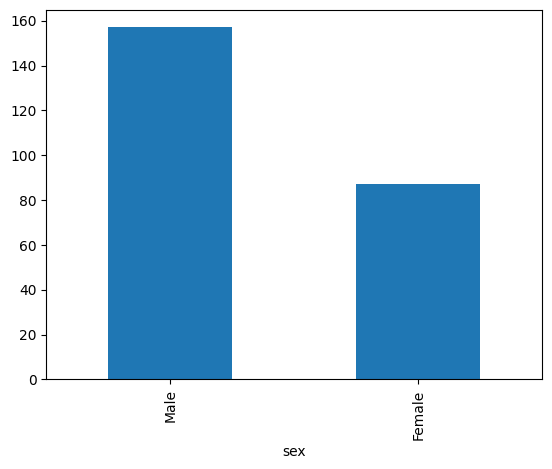

In [30]:
df_agent.invoke("Create bar chart for sex column.")